In [33]:
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv('../datasets/marketing_sales_data.csv')
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


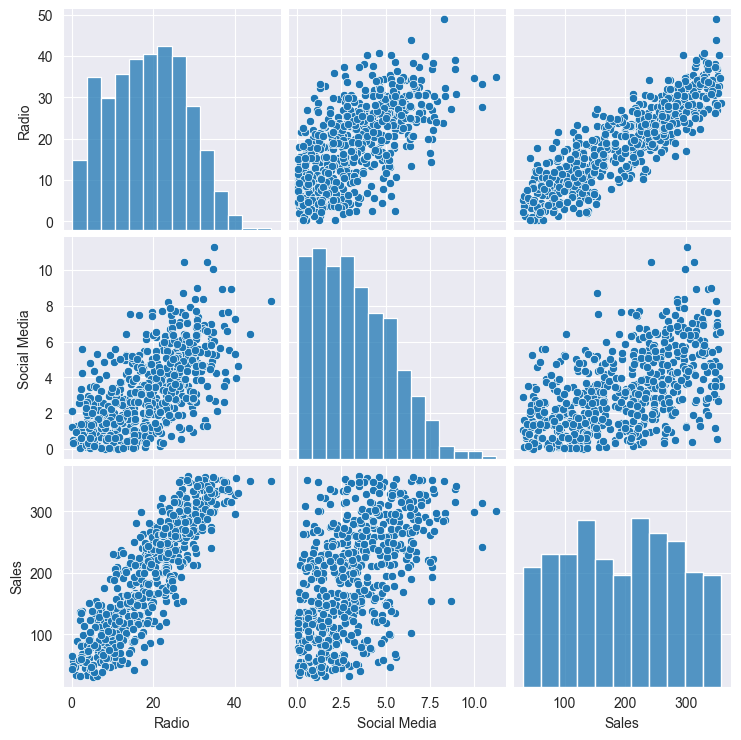

In [35]:
sns.pairplot(data)

In [36]:
# calculating the mean sales for each categorical variable
print(data.groupby("TV")["Sales"].mean())
print(data.groupby("Influencer")["Sales"].mean())

TV
High      300.529591
Low        91.646843
Medium    199.023461
Name: Sales, dtype: float64
Influencer
Macro    205.660047
Mega     180.385096
Micro    198.655080
Nano     190.777766
Name: Sales, dtype: float64


In [37]:
data.dropna(inplace=True, axis=0)

In [38]:
# cleaning the column names for ols function. because ols() doesn't run when variable names contain space
data = data.rename(columns={"Social Media": "Social_Media"})

In [39]:
ols_formula = "Sales ~ C(TV) + Radio"
OLS = ols(formula=ols_formula, data=data[["TV", "Sales", "Radio"]])
model = OLS.fit()
model_results = model.summary()
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Thu, 21 Aug 2025   Prob (F-statistic):          1.61e-287
Time:                        16:57:57   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

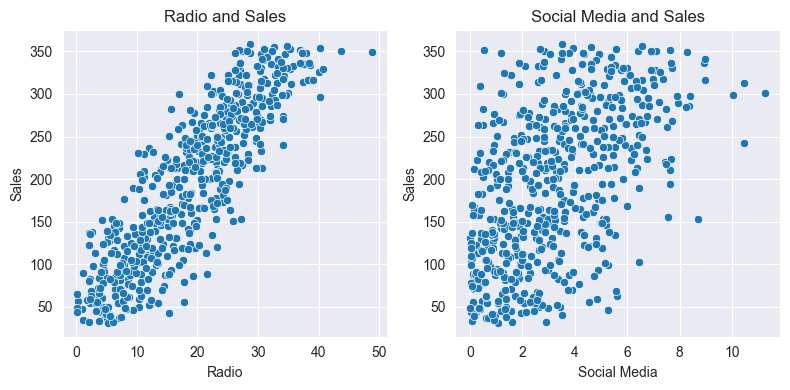

In [40]:
fig, axes = plt.subplots(1, 2, figsize = (8,4))


sns.scatterplot(x = data['Radio'], y = data['Sales'],ax=axes[0])


axes[0].set_title("Radio and Sales"),
sns.scatterplot(x = data['Social_Media'], y = data['Sales'],ax=axes[1])

axes[1].set_title("Social Media and Sales")

axes[1].set_xlabel("Social Media")

plt.tight_layout()


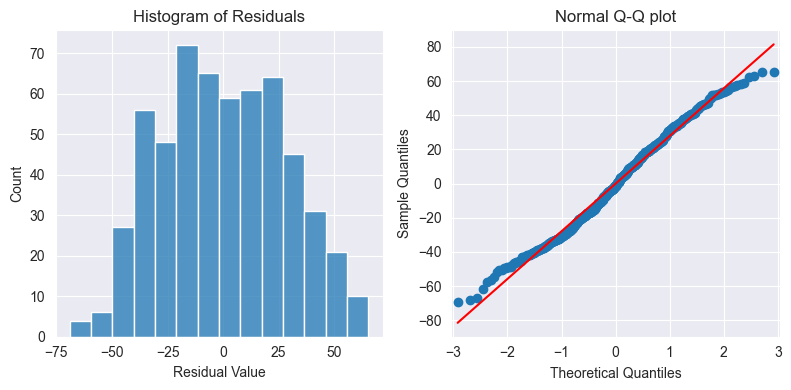

In [42]:
#checking the normality assumption
residuals = model.resid

fig, axes = plt.subplots(1, 2, figsize = (8,4))

sns.histplot(residuals, ax=axes[0])

axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("Normal Q-Q plot")

plt.tight_layout()

plt.show()

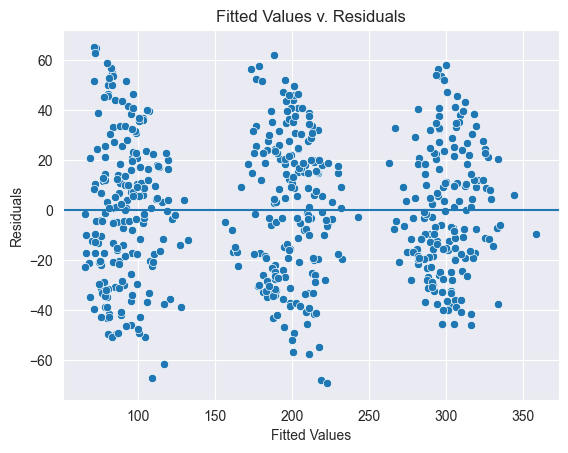

In [43]:
# checking the constant variance assumption
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")

fig.axhline(0)
plt.show()

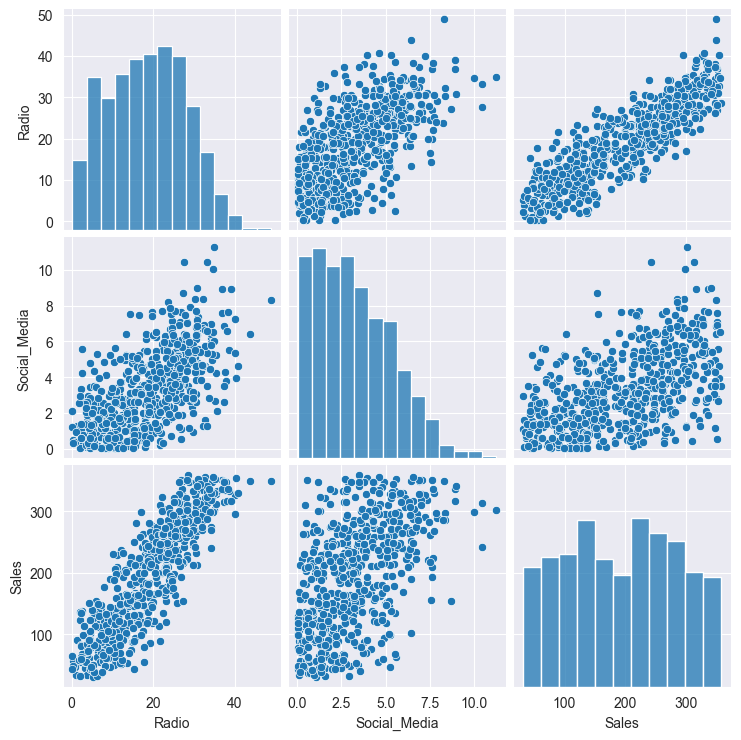

In [44]:
sns.pairplot(data)

In [45]:
# checking the variance inflation factor to determine if the no multicollinearity assumption is me t
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data[['Radio','Social_Media']]

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

df_vif

,VIF
Radio,4.93238
Social_Media,4.93238


the variance inflation factor when both Radio and Social_Media are included in the model is 4.93 for each variable, indicating high multicollinearity.

In [46]:
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Thu, 21 Aug 2025   Prob (F-statistic):          1.61e-287
Time:                        16:57:57   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* $\beta_{0} =  217.6367$
* $\beta_{TVLow}= -152.0897$
* $\beta_{TVMedium} = -73.4835$
* $\beta_{Radio} =  2.8864$

$\text{Sales} = \beta_{0} + \beta_{1}*X_{1}+ \beta_{2}*X_{2}+ \beta_{3}*X_{3}$

$\text{Sales} = \beta_{0} + \beta_{TVLow}*X_{TVLow}+ \beta_{TVMedium}*X_{TVMedium}+ \beta_{Radio}*X_{Radio}$

$\text{Sales} = 217.6367 - 152.0897*X_{TVLow} - 73.4835*X_{TVMedium}+ 2.8864*X_{Radio}$